## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
sou_rec_pos = pd.read_pickle("sou_rec_pos.pkl")
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth
0,1,1182365,1105911,1181982,1106233,1121,1137,0
1,1,1182365,1105911,1182018,1106201,1099,1137,0
2,1,1182365,1105911,1182053,1106169,1090,1137,0
3,1,1182365,1105911,1182089,1106137,1082,1137,0
4,1,1182365,1105911,1182124,1106105,1073,1137,0
...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0
3566874,3645,1201128,1105871,1200978,1106024,321,319,0
3566875,3645,1201128,1105871,1201013,1105992,321,319,0
3566876,3645,1201128,1105871,1201049,1105959,320,319,0


## Plot receivers

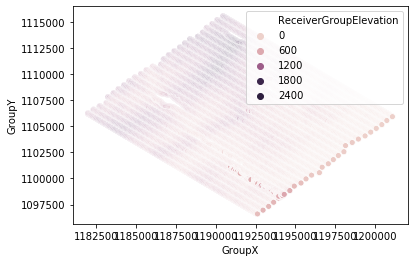

In [3]:
rec_pos_ele=sou_rec_pos.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos_ele, x="GroupX", y="GroupY", hue="ReceiverGroupElevation")
plt.show()

## RBF interpolation

In [4]:
x=rec_pos_ele['GroupX'].to_numpy().astype('f')
y=rec_pos_ele['GroupY'].to_numpy().astype('f')
z=rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f')
xmin=rec_pos_ele['GroupX'].min()
xmax=rec_pos_ele['GroupX'].max()
ymin=rec_pos_ele['GroupY'].min()
ymax=rec_pos_ele['GroupY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
#Creating the interpolation function and populating the output matrix value
from scipy.interpolate import Rbf
rbf = Rbf(x, y, z, function='inverse')
ZI = rbf(XI, YI)

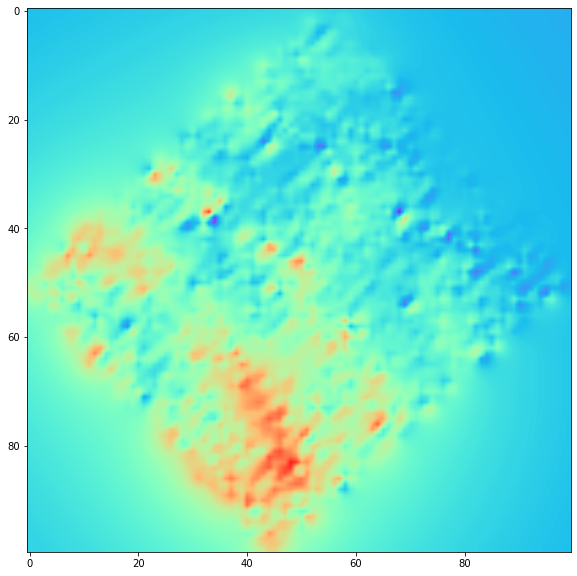

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.rainbow, alpha=.9, interpolation='bilinear')
#plt.colorbar()
plt.show()

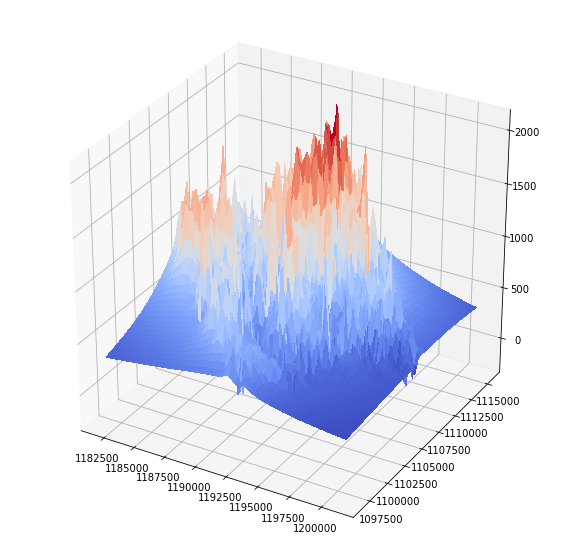

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XI, YI, ZI, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)